# Circular Binary Segmentation
> DNAコピー数のセグメントアルゴリズムの一つを体験する

- toc: true 
- badges: false
- comments: true
- categories: [bioinformatics]
- image: images/cbs.png

## 必要なパッケージのインポート

In [1]:
library(DNAcopy)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## サンプルデータのインポート

In [2]:
data(coriell)
head(coriell)

Clone,Chromosome,Position,Coriell.05296,Coriell.13330
GS1-232B23,1,0,NA,0.207470
RP11-82d16,1,468,0.008824,0.063076
RP11-62m23,1,2241,-0.000890,0.123881
RP11-60j11,1,4504,0.075875,0.154343
RP11-111O05,1,5440,0.017303,-0.043890
RP11-51b04,1,7000,-0.006770,0.094144


## とりあえず可視化

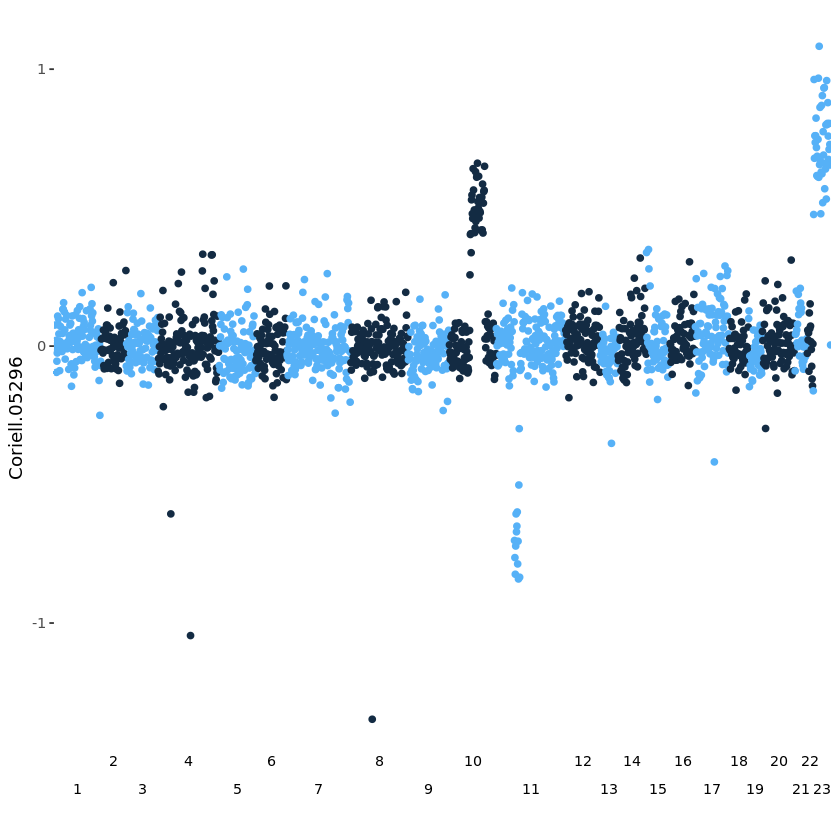

In [3]:
coriell.rmna <- drop_na(coriell)

chrom_pos <- coriell.rmna %>%
    mutate(id = 1:nrow(coriell.rmna)) %>%
    group_by(Chromosome) %>%
    summarise(min = min(id), pos = median(id), max=max(id))

y.pos <- replace(rep(-1.6, 23), seq(0,23,2), -1.5)
coriell.rmna %>%
mutate(id = 1:nrow(coriell.rmna), class = coriell.rmna$Chromosome %% 2) %>%
ggplot2::ggplot() + 
geom_point(mapping = aes(x = interaction(Chromosome, id, lex.order=T), y = Coriell.05296, color=class)) +
annotate(geom = "text", x = chrom_pos$pos, y = y.pos, size=3, label = unique(coriell.rmna$Chromosome)) +
theme(axis.title.x=element_blank(),
      axis.text.x=element_blank(),
      axis.ticks.x=element_blank(),
      legend.position="none")

## Circular Binary Segmentationはパッケージ化されている

- #1 DNAcopyオブジェクトの作成
- #2 外れ値の除去（後述）
- #3 Circular Binary Segmentationの実行

※実装に関してはパッケージの中身をみるか、またはpythonが読める人なら[こちら](https://github.com/jeremy9959/cbs)が役に立つ。

In [4]:
CNA.object <- CNA(cbind(coriell$Coriell.05296),
    coriell$Chromosome, coriell$Position,
    data.type="logratio", sampleid="c05296") #1
smoothed.CNA.object <- smooth.CNA(CNA.object) #2
segment.smoothed.CNA.object <- segment(smoothed.CNA.object, verbose=1) #3

Warning message in CNA(cbind(coriell$Coriell.05296), coriell$Chromosome, coriell$Position, :
“array has repeated maploc positions
”

Analyzing: c05296 


<br>

オブジェクトの中身をみれば、具体的なブレイクポイントがわかる。

In [5]:
segment.smoothed.CNA.object

Call:
segment(x = smoothed.CNA.object, verbose = 1)

       ID chrom loc.start loc.end num.mark seg.mean
1  c05296     1       468  240000      132   0.0212
2  c05296     2         0  245000       64   0.0095
3  c05296     3         0  218000       86   0.0025
4  c05296     4         0  171809      143  -0.0087
5  c05296     4    172856  179118        9   0.1752
6  c05296     4    179200  184000       13  -0.0350
7  c05296     5         0  198500      108  -0.0107
8  c05296     6         0  188000       85  -0.0048
9  c05296     7         0  161500      172  -0.0042
10 c05296     8         0  147000      151  -0.0026
11 c05296     9         0  115000      111  -0.0236
12 c05296    10         0   64187       53  -0.0165
13 c05296    10     65000   69549        4   0.3509
14 c05296    10     70547  110000       37   0.5164
15 c05296    10    110412  142000       32  -0.0076
16 c05296    11         0   34420       51   0.0121
17 c05296    11     35416   39623       15  -0.6511
18 c05296  

<br>
DataFrameも取得可能

In [6]:
segment.smoothed.CNA.object[['output']]

ID,chrom,loc.start,loc.end,num.mark,seg.mean
c05296,1,468,240000,132,0.0212
c05296,2,0,245000,64,0.0095
c05296,3,0,218000,86,0.0025
c05296,4,0,171809,143,-0.0087
c05296,4,172856,179118,9,0.1752
c05296,4,179200,184000,13,-0.0350
c05296,5,0,198500,108,-0.0107
c05296,6,0,188000,85,-0.0048
c05296,7,0,161500,172,-0.0042
c05296,8,0,147000,151,-0.0026


<br>
可視化も一瞬

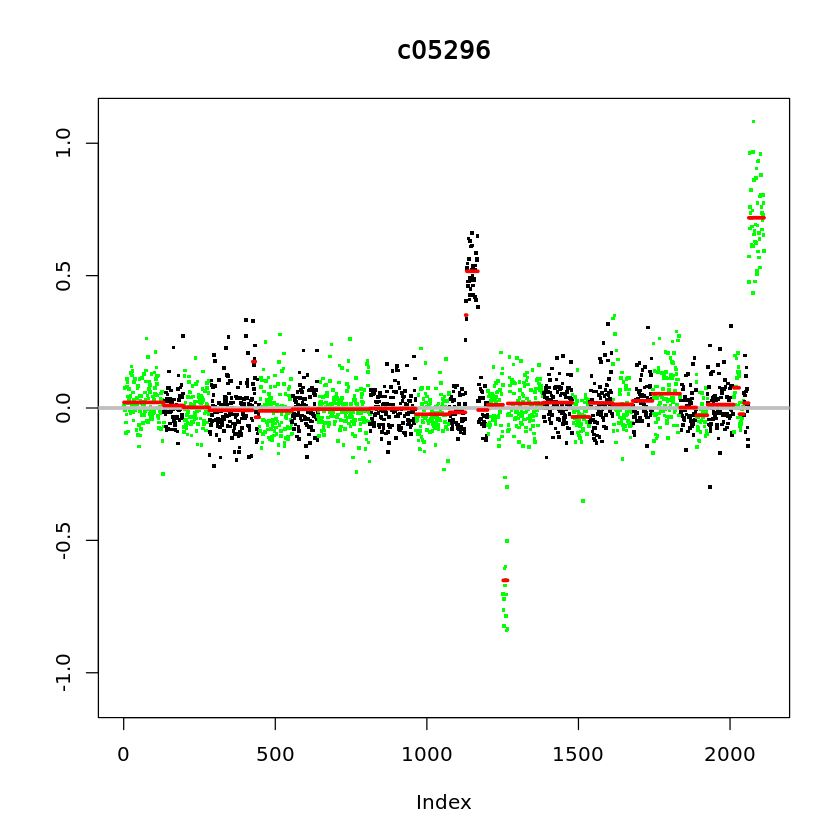

In [7]:
plot(segment.smoothed.CNA.object, plot.type="whole")

## 外れ値の除去に関して

各添字 $i\ (i = 1, 2, ..., n)$ に対して、$i - R, ..., i, ..., i + R\ (2≤R≤5)$ のウィンドウを定義する。

$m_i$ をウィンドウ領域の中央値とし、$\hat\sigma$ を標準偏差とする。

観測値 $X_i$ がウィンドウ領域の最大値または最小値だった場合、その値に最も近い値を持つ $X_j$ を探す。

$|X_j - X_i|>L\hat\sigma\ (default: L=4)$ だった場合、$X_i$ を $m_{i}+sign(X_i-X_j)M\hat\sigma$ に置き換える。